Question 4 and 5 Assignment 3 

Alexandra Belinda Santosa - a1785180

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import sys
import matplotlib
import pandas as pd
import random
import numpy as np
import io
import matplotlib.pyplot as plt
from math import exp 
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist

In [126]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset_2/mnist.csv',header=None)

In [127]:
#For X_train
X_train = train.iloc[:,1:].to_numpy()

#4000test set
X_train_optimal=train.iloc[:4000,1:].to_numpy()

#2000 tests et
Y_train_optimal=train.iloc[:2000,1:].to_numpy()
print(Y_train_optimal.shape)
X_train_optimal.shape

#To test RBF
X_train_rbf=train.iloc[:500,1:].to_numpy()
print(X_train_rbf.shape)
y_train = train.iloc[:,0].to_numpy()

(2000, 784)
(500, 784)


In [128]:
#For q4
class KMeans2(object):

    def __init__(self): 
        pass
 
    def pairwise_dist_eucl(self,x,y): 
      #calculate the distance ( Euclidean dsitance)   
        x_2 = np.sum(np.square(x),axis=1);
        y_2 = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(x_2[:, np.newaxis] + y_2-2*mul))
        return dists

   

    def centers_assignment(self, X, k):  
        r, c = X.shape
        array_ret = np.empty([k, c])
        for n in range(k):
            random_index = np.random.randint(r)
            array_ret[n] = X[random_index]
        
        return array_ret
   

    def label_assignment(self, centroids, points):  
        #assign labels
        r, c = points.shape
        #set an empty array
        labels1 = np.empty([r])
        #assign label to the closest distance
        dists =self.pairwise_dist_eucl(points, centroids)
        labels1 = np.argmin(dists, axis=1)
      
        return labels1

    def centers_new(self, centers_old, labels1, X):  
        k, d = centers_old.shape
        centers_new_arr = np.empty(centers_old.shape)
        for i in range(k):
            centers_new_arr[i] = np.array(X[labels1 == i].mean(0))
        return centers_new_arr
    
    

    def calculate_loss(self, centroids, labels1, X):  
        dists = self.pairwise_dist_eucl(X, centroids)
        loss = 0.0
        n, d = X.shape
        for i in range(n):
            d1=dists[i]
            l1=labels1[i]
            #count  the loss (sum the distance and centers)
            loss = loss + np.square(d1[l1])
  
        return loss
  
    
    def __call__(self, X, k, max_iters=10):
  
    
        centroids = self.centers_assignment(X, k)
        #To store iteration and array
        
        for it in range(max_iters):
            
            labels1 = self.label_assignment(centroids,X)
            centroids = self.centers_new(centroids, labels1, X)
            loss = self.calculate_loss(centroids, labels1, X)
            k= centroids.shape[0]
           
            
            

    
            #if verbose: #Print the iteration and losses
             #print('test' , it , 'loss',loss)
            

    
         #Plot the number of iteration and losses
        
        return  labels1, centroids , loss
      
      
    
            
                    
              

In [129]:
def find_k(X, maxK=10):
        pred = np.empty(maxK)
        for i in range(maxK):
            #assign the label,center and loss for each K
            labels_optimal, centers_optimal, pred[i] = KMeans2()(X, i + 1)
            

        # Plot in the losses and range of K    
        plt.plot(np.arange(maxK) + 1, pred)
        plt.xlabel('Number of Cluster (K)')
        plt.show()
        return  pred

In [130]:
#Test Kmeans function
KMeans2()(X_train,10)

(array([8, 5, 6, ..., 2, 7, 3]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 233555.15549760123)

In [131]:
#Normal Kmeans with the X_train_rbf ( 500 samples)
KMeans2()(X_train_rbf,5)

(array([4, 4, 0, 2, 0, 3, 2, 4, 2, 0, 4, 2, 4, 1, 2, 0, 3, 2, 1, 2, 0, 4,
        0, 2, 3, 4, 0, 4, 4, 2, 2, 2, 1, 0, 4, 3, 1, 4, 0, 1, 2, 2, 0, 2,
        2, 0, 2, 2, 0, 4, 4, 4, 0, 2, 0, 0, 4, 0, 0, 2, 0, 2, 1, 4, 1, 2,
        1, 2, 4, 4, 2, 0, 2, 1, 4, 4, 2, 2, 2, 0, 4, 4, 4, 1, 0, 2, 0, 0,
        4, 0, 1, 0, 0, 1, 2, 4, 0, 2, 4, 2, 0, 0, 2, 0, 2, 2, 1, 4, 4, 0,
        0, 4, 2, 2, 4, 0, 0, 4, 4, 4, 4, 4, 3, 0, 2, 2, 1, 3, 2, 1, 2, 0,
        2, 0, 0, 4, 2, 2, 4, 0, 0, 2, 0, 2, 2, 3, 2, 1, 0, 4, 2, 1, 2, 0,
        0, 1, 4, 4, 0, 3, 0, 4, 0, 0, 0, 1, 0, 0, 2, 4, 0, 3, 0, 2, 2, 3,
        0, 2, 3, 4, 2, 0, 4, 0, 2, 0, 2, 3, 0, 3, 3, 3, 4, 0, 0, 0, 0, 2,
        2, 3, 2, 2, 2, 4, 1, 2, 4, 0, 2, 4, 4, 2, 0, 3, 0, 4, 4, 0, 1, 4,
        3, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2, 1, 3, 4, 4, 4, 0, 1, 3, 2, 1,
        4, 0, 4, 4, 4, 0, 2, 4, 0, 2, 2, 3, 4, 4, 2, 0, 0, 3, 0, 1, 3, 0,
        0, 4, 4, 0, 0, 2, 2, 0, 0, 3, 2, 0, 2, 3, 1, 4, 0, 4, 0, 4, 4, 0,
        1, 3, 0, 0, 2, 2, 0, 4, 0, 2, 

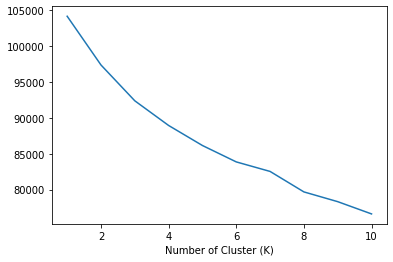

array([104167.94429659,  97368.63144761,  92373.49175486,  88932.76588344,
        86138.20886514,  83851.57034984,  82523.65537875,  79666.75580143,
        78306.51371259,  76597.14008809])

In [132]:
find_k(X=Y_train_optimal)

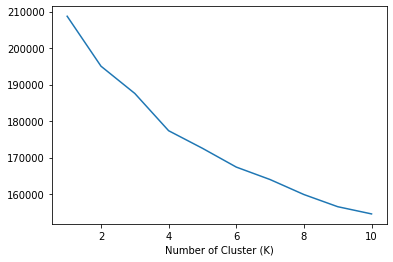

array([208742.60733193, 195046.90694933, 187572.62949209, 177354.03985439,
       172532.63892101, 167381.05824685, 163963.83896286, 159853.74367887,
       156517.09073299, 154537.74425453])

In [133]:
find_k(X=X_train_optimal)

Q5 kernel RBF

In [134]:
X=X_train_rbf

In [135]:
#Calculate Sigma solution 1
def sigma_find(X, Y):
    sigmma = 0
    for x in X:
        for y in Y:
            temp = x - y
            sigmma += temp**2
    sigmma = sigmma / (len(X)**2)
    return sigmma

In [136]:
#Call the function
sigma_1=np.sum(sigma_find(X,X_train_rbf))
print(sigma_1)

102.01194161955888


In [137]:
#Count in the hyperparameter
#Option 2
normssq = cdist(X,X_train_rbf,'sqeuclidean')
sigma_2= 1/500**2*np.sum(normssq)
print(sigma_2)
#count the kernel funciton
kmatrix = np.exp(-normssq/sigma_2)
print(kmatrix)

102.0119416195002
[[1.         0.42356793 0.31368959 ... 0.35607876 0.44157821 0.415671  ]
 [0.42356793 1.         0.2817014  ... 0.34320126 0.34275148 0.37696311]
 [0.31368959 0.2817014  1.         ... 0.40774871 0.44471621 0.29878051]
 ...
 [0.35607876 0.34320126 0.40774871 ... 1.         0.43982207 0.40343488]
 [0.44157821 0.34275148 0.44471621 ... 0.43982207 1.         0.48823275]
 [0.415671   0.37696311 0.29878051 ... 0.40343488 0.48823275 1.        ]]


In [138]:
def kernel(X, Y ,sigma_final):
    normssq = cdist(X,Y,'sqeuclidean')
    #500 is the number of samples
    sigma_2= 1/500**2*np.sum(normssq)
    kmatrix = np.exp(-normssq/sigma_2)
    return kmatrix

In [139]:
data1=kernel(X,X_train_rbf,102)

In [140]:
#Count Kmeans with the Kernelized data
result=KMeans2()(data1,5)
print(result)

(array([3, 3, 3, 2, 1, 1, 2, 3, 2, 1, 3, 2, 3, 4, 2, 1, 3, 1, 2, 2, 0, 0,
       1, 2, 2, 3, 1, 0, 0, 2, 3, 3, 4, 1, 3, 2, 4, 3, 1, 4, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 3, 3, 0, 3, 2, 1, 1, 0, 1, 3, 2, 0, 2, 4, 0, 4, 2,
       4, 2, 0, 0, 2, 1, 2, 4, 3, 3, 3, 2, 2, 1, 3, 3, 0, 4, 1, 1, 3, 1,
       0, 1, 4, 1, 1, 4, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 4, 3, 0, 4,
       1, 0, 2, 2, 0, 1, 1, 0, 3, 0, 0, 0, 3, 1, 2, 2, 4, 1, 2, 4, 2, 1,
       2, 1, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3, 2, 1, 3, 4, 1, 3, 1, 4, 2, 2,
       1, 4, 0, 3, 3, 3, 1, 3, 1, 1, 0, 4, 1, 1, 2, 3, 1, 3, 1, 2, 2, 1,
       1, 2, 3, 3, 2, 3, 3, 1, 2, 1, 4, 0, 3, 3, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 1, 3, 4, 2, 0, 3, 2, 0, 1, 2, 2, 0, 3, 3, 3, 1, 4, 3,
       0, 4, 0, 1, 1, 3, 1, 1, 3, 0, 1, 2, 1, 3, 3, 3, 3, 1, 4, 3, 2, 0,
       3, 1, 0, 3, 0, 1, 2, 0, 3, 2, 3, 0, 3, 3, 2, 1, 1, 1, 1, 4, 4, 1,
       1, 3, 3, 1, 1, 2, 2, 1, 3, 1, 3, 1, 2, 0, 4, 3, 1, 3, 1, 0, 3, 1,
       0, 2, 1, 1, 2, 3, 1, 0, 0, 2, 0, 1, 3, 4, 2

In [141]:
K = 5  
#assign centers to the data point 
centers = [KMeans2()(X_train_rbf,K)[1]]
for i in range(K):
    centers1=np.append(data1[i],centers)
    print(centers1)
    #print(labels1)
    
#Print in the new centers
labels1,centers1,loss=KMeans2()(data1,5)
print(centers1)

  


[1.         0.42356793 0.31368959 ... 0.         0.         0.        ]
[0.42356793 1.         0.2817014  ... 0.         0.         0.        ]
[0.31368959 0.2817014  1.         ... 0.         0.         0.        ]
[0.37381788 0.31542937 0.3690009  ... 0.         0.         0.        ]
[0.34071915 0.34868012 0.37131654 ... 0.         0.         0.        ]
[[0.36421779 0.3504385  0.38196707 ... 0.38317068 0.47142023 0.3752088 ]
 [0.42680698 0.35037088 0.32857686 ... 0.37313929 0.39905114 0.4479886 ]
 [0.2968699  0.37390582 0.28180607 ... 0.29788576 0.30290566 0.29563956]
 [0.40958361 0.33268363 0.37859862 ... 0.45477703 0.48898765 0.48277075]
 [0.3979272  0.33977768 0.39715965 ... 0.4426297  0.45343572 0.41756183]]
